<h1><center>Introduction</center></h1>
Safaricom describes Fuliza as an emergency loan that enables you to complete your M-PESA transactions even when you have insufficient funds in your M-PESA account. You may access these funds multiple times as long as you are within your Fuliza limit. Fuliza differs sharply from bank loans including overdrafts. It also differs in very significant ways with loans offered by other digital lenders. Most notably, Fuliza is not a loan product i.e. it cannot be redeemed for cash/cheque; it is a service that allows you to pay for goods and services on the Mpesa platform when you do not have sufficient balance. This greatly limits the borrower's freedom on expenditure.

Moreover, Fuliza is a short term facility that should be repaid within a day or two. However, most customers end up paying unreasonable interest amounts after overstaying with the facility. Finally, Fuliza automatically recover their facility plus accrued interest immediately a deposit is made into the mpesa account. This makes defaulting very unlikely for most customers as they do not wish to lose their cellphone number.

This project uses LoanDefault_LTFS_AV(ML_FINHACK) (available on Kaggle) dataset to derive crucial relationships between the different parameters that lenders use to predict whether a customer will default on their installment or not. Whereas, the original project adopted a classification approach (the project was interested in classifying the test dataset- not used in this project- into defaulters and prompt payers) this project considers the problem at hand as a clustering problem. The main concern of this project is to categorize the customers into groups with varying risk profiles.

In [2]:
import pandas as pd
data = pd.read_csv("train_LTFS.csv")
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


<h1><center>Factors Affecting Credit Score</center></h1>
According to experian, the top five factors that affect one's credit score include:

1. Payment history. Payment history is the most important ingredient in credit scoring, and even one missed payment can have a negative impact on your score. Lenders want to be sure that you will pay back your debt, and on time, when they are considering you for new credit. Payment history accounts for 35% of your FICO Score , the credit score used by 90% of top lenders.

2. Amounts owed. Your credit usage, particularly as represented by your credit utilization ratio, is the next most important factor in your credit scores. Your credit utilization ratio is calculated by dividing the total revolving credit you are currently using by the total of all your revolving credit limits. This ratio looks at how much of your available credit you're utilizing and can give a snapshot of how reliant you are on non-cash funds. Using more than 30% of your available credit is a negative to creditors. Credit utilization accounts for 30% of your FICO® Score.

3. Credit history length. How long you've held credit accounts makes up 15% of your FICO Score. This includes the age of your oldest credit account, the age of your newest credit account and the average age of all your accounts. Generally, the longer your credit history, the higher your credit scores.

4. Credit mix. People with top credit scores often carry a diverse portfolio of credit accounts, which might include a car loan, credit card, student loan, mortgage or other credit products. Credit scoring models consider the types of accounts and how many of each you have as an indication of how well you manage a wide range of credit products. Credit mix accounts for 10% of your FICO Score.

5. New credit. The number of credit accounts you've recently opened, as well as the number of hard inquiries lenders make when you apply for credit, accounts for 10% of your FICO Score. Too many accounts or inquiries can indicate increased risk, and as such can hurt your credit score.

We have dropped all the columns that do not affect credit score in any way and all other redunndant columns.

In [4]:
del data["branch_id"], data["DisbursalDate"], data["supplier_id"],data["manufacturer_id"], data["Current_pincode_ID"]
del data["Date.of.Birth"],data["State_ID"],data["Employee_code_ID"],data["MobileNo_Avl_Flag"]
del data["Aadhar_flag"],data["PAN_flag"],data["VoterID_flag"],data["Passport_flag"]

In [5]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,Employment.Type,Driving_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,Salaried,0,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,Self employed,0,598,I-Medium Risk,1,1,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,Self employed,0,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,Self employed,0,305,L-Very High Risk,3,0,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,Self employed,0,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


<h1><center>Employment Status</center></h1>

While having a job/source of income doesn't automatically guarantee a high credit score, most lenders use it as a means of assessing credit worthiness. The biggest challenge, however, is that a significant percentage of borrowers do not disclose their employment status to the lenders. While this doesn't disqualify them from accessing credit (several other parameters are considered), it may significantly reduce the amount accessible to them.

Experian explains that mortgage lenders specifically look at your debt-to-income ratio (DTI), or your monthly debt payments divided by your monthly income, as a measure of your capacity to take on more debt. A lower DTI suggests that you won't struggle to manage monthly payments and pay back what you owe.

Employment could also indirectly impact your ability to access credit if your employment status creates an obstacle to managing credit effectively. For example, if you go through a period of unemployment and loss of income, you may struggle to make debt payments on time. Or, you may apply for multiple credit cards in a short period of time or max out the credit cards you already have.

Fuliza particularly ignores the customer's employment status. It's scoring rationale is heavily reliant on M-Pesa transaction history. The net effect is that most unemployed individuals, especially those who have recently lost their sources of income, risk sinking deeper into Fuliza debts compared to their salaried and self-employed counterparts who are very unlikely to have zero balance in the M-Pesa wallet at any given time. Individuals who would ideally not qualify for a bank loan have access to Fuliza overdraft, take longer to service the facility, and eventually pay insane interests as a result.

<h1><center>Fuliza Interest Rate Chart</center></h1>

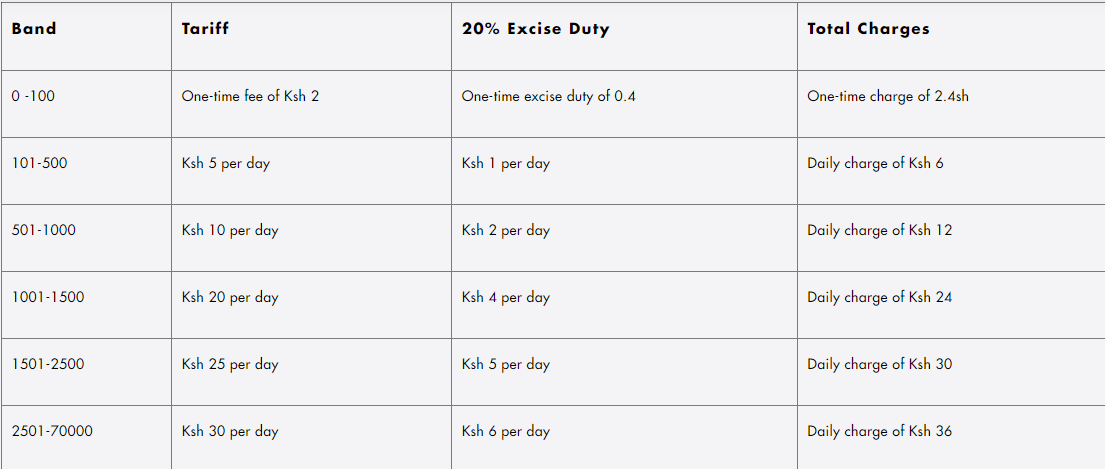

#### Suppose a customer "borrows" Ksh 150 and takes a month to settle the facility. They will be expected to repay a total of Ksh 330 (Principle Amount = 150, Interest = 180). This translates to 120% interest per month.

In [7]:
data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
Employment.Type                        7661
Driving_flag                              0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT                      0
SEC.NO.OF.ACCTS                           0
SEC.ACTIVE.ACCTS                          0
SEC.OVERDUE.ACCTS                         0
SEC.CURRENT.BALANCE                       0
SEC.SANCTIONED.AMOUNT                     0
SEC.DISBURSED.AMOUNT                      0
PRIMARY.INSTAL.AMT                        0
SEC.INSTAL.AMT                            0
NEW.ACCTS.IN.LAST.SIX.MONTHS    

#### 7661 customers failed to declare their employment status thus were assumed to be unemployed. On the contrary Fuliza doesn't explicitly request customers to declare their employment statuses.

In [8]:
data['Employment.Type'].fillna('Unemployed', inplace = True)

In [9]:
data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Unemployed         7661
Name: Employment.Type, dtype: int64

In [10]:
#Transforming the Employment.Type into a category marked by a integer label.
data['Employment.Type']=data['Employment.Type'].astype('category')
data['Employment.Type']=data['Employment.Type'].cat.codes
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,Employment.Type,Driving_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,0,0,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,1,0,598,I-Medium Risk,1,1,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,1,0,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,1,0,305,L-Very High Risk,3,0,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,1,0,0,No Bureau History Available,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


### Key
0 - Salaried,
1 - Self employed,
2 - Unemployed.

<h1><center>PERFORM_CNS.SCORE</center></h1>

The dataset used in this study uses a credit score parameter called the PERFORM_CNS.SCORE. This score is reliant on various factors some of which are provided in the description below.

In [11]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

#### From the brief descriptions we can deduce some of the fundamental factors that contribute to the credit score of a customer. The CNS score can be equated to Kenya's CRB score. Lenders in Kenya rely heavily on CRB listing to determine the credit worthiness of customers. Fuliza, however, rely on it's internal data to assess customers. Fuliza facilities are advanced to most M-Pesa customers including those negatively listed on CRB.

In [12]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

##### Most of the customers (116950) had absolutely no borrowing history thus ended up with a CNS score of 0.

#### Technically speaking, the 116950 customers with no borrowing history are considered uncreditworthy. The bank, in its own discretion would then assess the customer's transactions with the bank and other banks to decide whether or not they can advance a loan facility. In most cases the bank would deny the loan request.

#### In Fuliza, however, almost all the uncreditworthy individuals will qualify for some amount of overdraft, however, small. While Fuliza, expects the customers to settle the facility within a day or two, most customers in this category take weeks to settle the debt.

##### The format in which average account age and credit history length are presented presents a challenge in analysing then. The two are, however, well catered for in the CNS score.

In [14]:
del data['AVERAGE.ACCT.AGE'], data['CREDIT.HISTORY.LENGTH']
del data['PERFORM_CNS.SCORE.DESCRIPTION']
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,Employment.Type,Driving_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,1,0,598,1,1,1,...,0,0,0,0,1991,0,0,1,0,1
2,417566,53278,61360,89.63,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,1,0,305,3,0,0,...,0,0,0,0,31,0,0,0,1,1
4,539055,52378,60300,88.39,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


<h1><center>Clustering</center></h1>

We first use an elbow plot and a silhouette plot to determine the optimum number of clusters in our dataset. In this analysis the optimum number was determined as 6 clusters. Clustering enables us to derive similarities and differences between different members of the dataset. We will use KMeans algorithm from SciKitLearn to cluster our dataset. To ensure all the factors contribute fairly to the overall output we will first use the MinMaxScaler. This ensures the model doesn't rely excessively on the columns with high dynamic ranges.

In [15]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
#Selecting the right columns to use for training the algorithm.
data = data.iloc[:,3:20]
Scaled_data = Scaler.fit_transform(data)
x = pd.DataFrame(Scaled_data)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.935860,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.0,0.0,0.0,0.015698,0.0,0.0,0.000000
1,0.743792,0.5,0.0,0.671910,0.002208,0.006944,0.04,0.064978,0.00005,0.00005,0.0,0.0,0.0,0.015698,0.0,0.0,0.000078
2,0.936801,0.5,0.0,0.000000,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.0,0.0,0.0,0.015698,0.0,0.0,0.000000
3,0.923267,0.5,0.0,0.342697,0.006623,0.000000,0.00,0.064710,0.00000,0.00000,0.0,0.0,0.0,0.015698,0.0,0.0,0.000001
4,0.922208,0.5,0.0,0.000000,0.000000,0.000000,0.00,0.064710,0.00000,0.00000,0.0,0.0,0.0,0.015698,0.0,0.0,0.000000


Text(0.5, 1.0, 'Elbow plot')

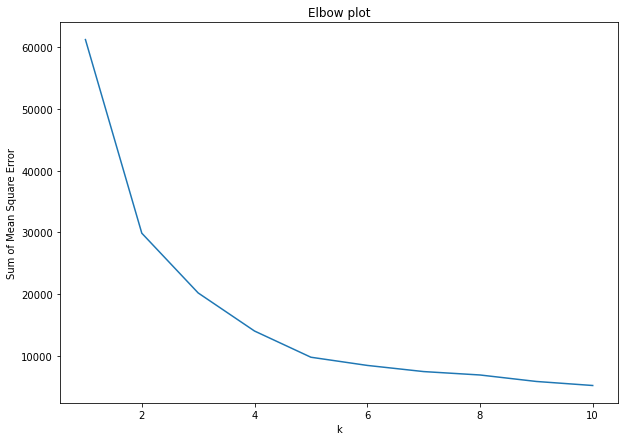

In [16]:
# Using an elbow plot to determine the optimum number of clusters in the data.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Mean_Square_Error=[]
k_range=range(1,11)
for k in k_range:
    x=KMeans(n_clusters=k)
    x.fit(Scaled_data)
    Mean_Square_Error.append(x.inertia_)
plt.figure(figsize=(10,7))
plt.xlabel('k')
plt.ylabel('Sum of Mean Square Error')
plt.plot(k_range,Mean_Square_Error)
plt.title('Elbow plot')

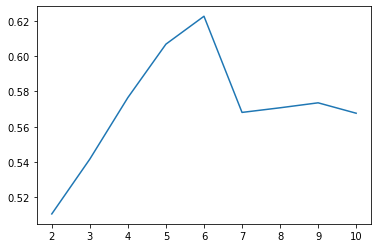

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
sil = []
k_range = range(2,11)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in k_range:
  kmeans = KMeans(n_clusters = k).fit(Scaled_data)
  labels = kmeans.labels_
  sil.append(silhouette_score(Scaled_data, labels, metric = 'euclidean'))
plt.plot(k_range,sil)

<h1><center>Data Visualization</center></h1>

To determine how members of different clusters relate we will plot different graphs and observe how different factors relate to determine the different clusters. From the graphs we will be able to derive meaning from our dataset. We will use matplotlib.pyplot to create scatter plots.

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data['Cluster']=KMeans(n_clusters=6).fit_predict(Scaled_data)
df1=data[data.Cluster==0]
df2=data[data.Cluster==1]
df3=data[data.Cluster==2]
df4=data[data.Cluster==3]
df5=data[data.Cluster==4]
df6=data[data.Cluster==5]

<h1><center>Current Account Balance versus CNS Score</center></h1>

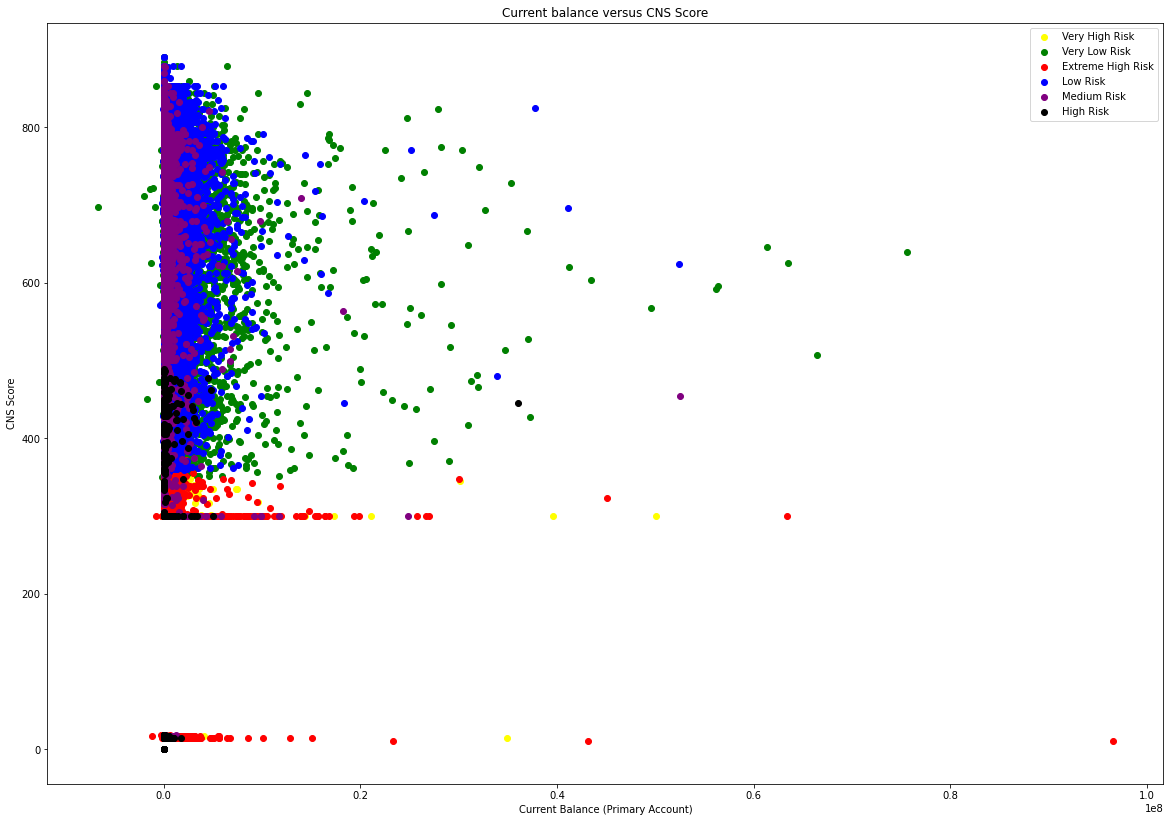

In [69]:
plt.figure(figsize=(20,14))
plt.scatter(df1['PRI.CURRENT.BALANCE'],df1['PERFORM_CNS.SCORE'],color='yellow',label='Very High Risk')
plt.scatter(df2['PRI.CURRENT.BALANCE'],df2['PERFORM_CNS.SCORE'],color='green',label='Very Low Risk')
plt.scatter(df3['PRI.CURRENT.BALANCE'],df3['PERFORM_CNS.SCORE'],color='Red',label='Extreme High Risk')
plt.scatter(df4['PRI.CURRENT.BALANCE'],df4['PERFORM_CNS.SCORE'],color='blue',label='Low Risk')
plt.scatter(df5['PRI.CURRENT.BALANCE'],df5['PERFORM_CNS.SCORE'],color='purple',label='Medium Risk')
plt.scatter(df6['PRI.CURRENT.BALANCE'],df6['PERFORM_CNS.SCORE'],color='black',label='High Risk')
plt.xlabel('Current Balance (Primary Account)')
plt.ylabel('CNS Score')
plt.title('Current balance versus CNS Score')
plt.legend()

<h1><center>Graph Analysis</center></h1>

The two parameters in question don't share a direct correlation. The CNS score is dependent on the customers borrowing history rather that bank account balance. However, from the graph there are some observable relationships between an individual's bank account balance and their credit worthiness. It can be observed that almost all indivuals with high balances have above average CNS scores. The average CNS score for very low risk customers (green), low risk customers (blue), and medium risk customers (purple) was higher that the higher risk customers. Medium risk customers (purple) particularly registered very high CNS scores. However, as shown in a later graph, most of the medium risk customers are salaried individuals will very low bank balances.

On the contrary, the trigger for a fuliza transaction is a zero or negative balance. While "credit worthy" individuals borrow as a means of raising capital for their businesses, acquiring assets, and keeping their distinct portfolios independent of each other, Fuliza customers borrow for consumption. The facility advanced to Fuliza customers doesn't generate any form of income to the customers. Furthermore, te facility has no incentives to guarantee prudent use. Most banj loans are secured using fixed assets. The risk of losing one's car, for example, is strong enough to guarantee the customer will spend the loan facility in the right way.

<h1><center>Disbursed Loan Amount versus CNS Score</center></h1>

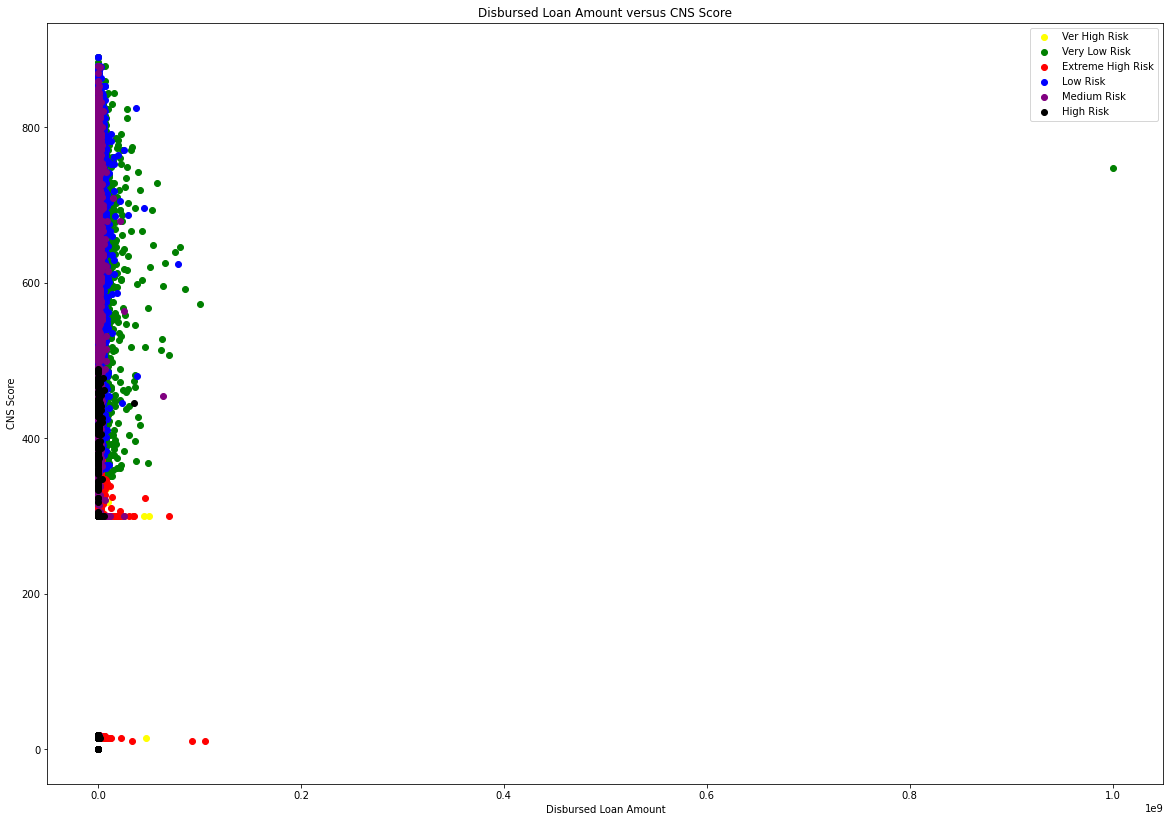

In [70]:
plt.figure(figsize=(20,14))
plt.scatter(df1['PRI.DISBURSED.AMOUNT'],df1['PERFORM_CNS.SCORE'],color='yellow',label='Ver High Risk')
plt.scatter(df2['PRI.DISBURSED.AMOUNT'],df2['PERFORM_CNS.SCORE'],color='green',label='Very Low Risk')
plt.scatter(df3['PRI.DISBURSED.AMOUNT'],df3['PERFORM_CNS.SCORE'],color='Red',label='Extreme High Risk')
plt.scatter(df4['PRI.DISBURSED.AMOUNT'],df4['PERFORM_CNS.SCORE'],color='blue',label='Low Risk')
plt.scatter(df5['PRI.DISBURSED.AMOUNT'],df5['PERFORM_CNS.SCORE'],color='purple',label='Medium Risk')
plt.scatter(df6['PRI.DISBURSED.AMOUNT'],df6['PERFORM_CNS.SCORE'],color='black',label='High Risk')
plt.xlabel('Disbursed Loan Amount')
plt.ylabel('CNS Score')
plt.title('Disbursed Loan Amount versus CNS Score')
plt.legend()

<h1><center>Graph analysis</center></h1>
Very low risk customers (green) accessed higher loan amounts compared to the rest. The trend observed when bank balances and CNS scores were compared holds. This shows that CNS, bank balance, and loan amount share a common relationship- referred to as financial discipline in informal setups. Individuals who live within their means are very likely to have a positive bank balance and pay their debts on time thus enjoy higher CNS scores which translate to higher loan amounts advanced to them.

On the contrary, individuals who live beyond their means are more likely to have negative bank balances and a ruined CNS reputation.

<h1><center>Number of Overdue Accounts versus CNS Score</center></h1>

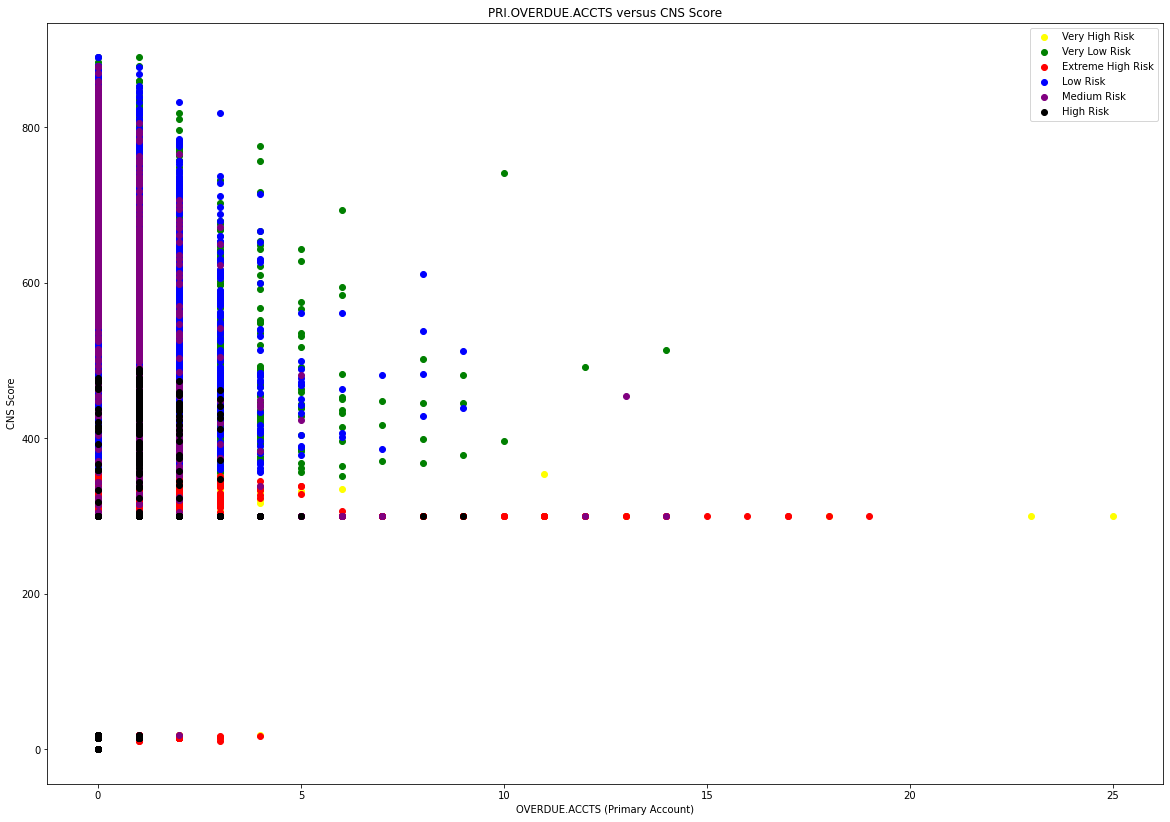

In [71]:
plt.figure(figsize=(20,14))
plt.scatter(df1['PRI.OVERDUE.ACCTS'],df1['PERFORM_CNS.SCORE'],color='yellow',label='Very High Risk')
plt.scatter(df2['PRI.OVERDUE.ACCTS'],df2['PERFORM_CNS.SCORE'],color='green',label='Very Low Risk')
plt.scatter(df3['PRI.OVERDUE.ACCTS'],df3['PERFORM_CNS.SCORE'],color='red',label='Extreme High Risk')
plt.scatter(df4['PRI.OVERDUE.ACCTS'],df4['PERFORM_CNS.SCORE'],color='blue',label='Low Risk')
plt.scatter(df5['PRI.OVERDUE.ACCTS'],df5['PERFORM_CNS.SCORE'],color='purple',label='Medium Risk')
plt.scatter(df6['PRI.OVERDUE.ACCTS'],df6['PERFORM_CNS.SCORE'],color='black',label='High Risk')
plt.xlabel('OVERDUE.ACCTS (Primary Account)')
plt.ylabel('CNS Score')
plt.title('PRI.OVERDUE.ACCTS versus CNS Score')
plt.legend()

<h1><center>Graph analysis</center></h1>
Extreme high risk individuals (red) cluster recorded individuals with the highest number of overdue accounts (loan defaults).
<h1><center>Loan to Value Ratio versus CNS</center></h1>

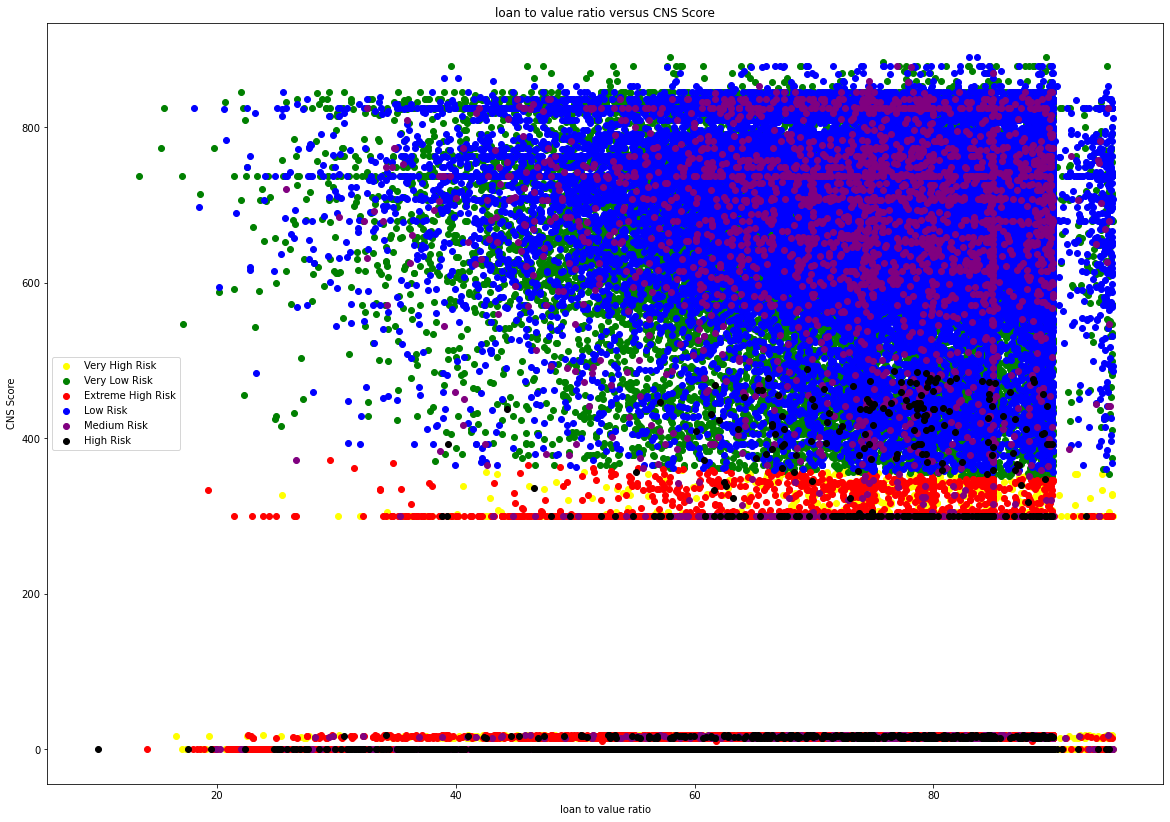

In [72]:
plt.figure(figsize=(20,14))
plt.scatter(df1['ltv'],df1['PERFORM_CNS.SCORE'],color='yellow',label='Very High Risk')
plt.scatter(df2['ltv'],df2['PERFORM_CNS.SCORE'],color='green',label='Very Low Risk')
plt.scatter(df3['ltv'],df3['PERFORM_CNS.SCORE'],color='red',label='Extreme High Risk')
plt.scatter(df4['ltv'],df4['PERFORM_CNS.SCORE'],color='blue',label='Low Risk')
plt.scatter(df5['ltv'],df5['PERFORM_CNS.SCORE'],color='purple',label='Medium Risk')
plt.scatter(df6['ltv'],df6['PERFORM_CNS.SCORE'],color='black',label='High Risk')
plt.xlabel('loan to value ratio')
plt.ylabel('CNS Score')
plt.title('loan to value ratio versus CNS Score')
plt.legend()

<h1><center>Graph analysis</center></h1>

Kyle Peterdy of the Corporate Finance Institute dexcribes Loan to Value Ratio as a representation of the proportion of an asset’s value that a lender is willing to provide debt financing against. It’s usually expressed as a percentage.

LTVs tend to be higher for assets that are considered more “desirable” as collateral. The desirability of an asset as collateral is generally measured by how stable its value is, how active its secondary market is, and how easily the title can be transferred to other parties (among other things).

The dataset used in this project was on mortgage thus most individuals, regardless of the cluster they eventually landed in, registered high LTV ratios. Understanding the concept of LTV, however, sheds light on the level of undesirability of Fuliza facilities. The facilities are very undesirable both to the lenders and the borrowers. To cushion M-Pesa against the risk, the interest rates have to be exorbitant.
<h1><center>Employment Type versus CNS</center></h1>

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


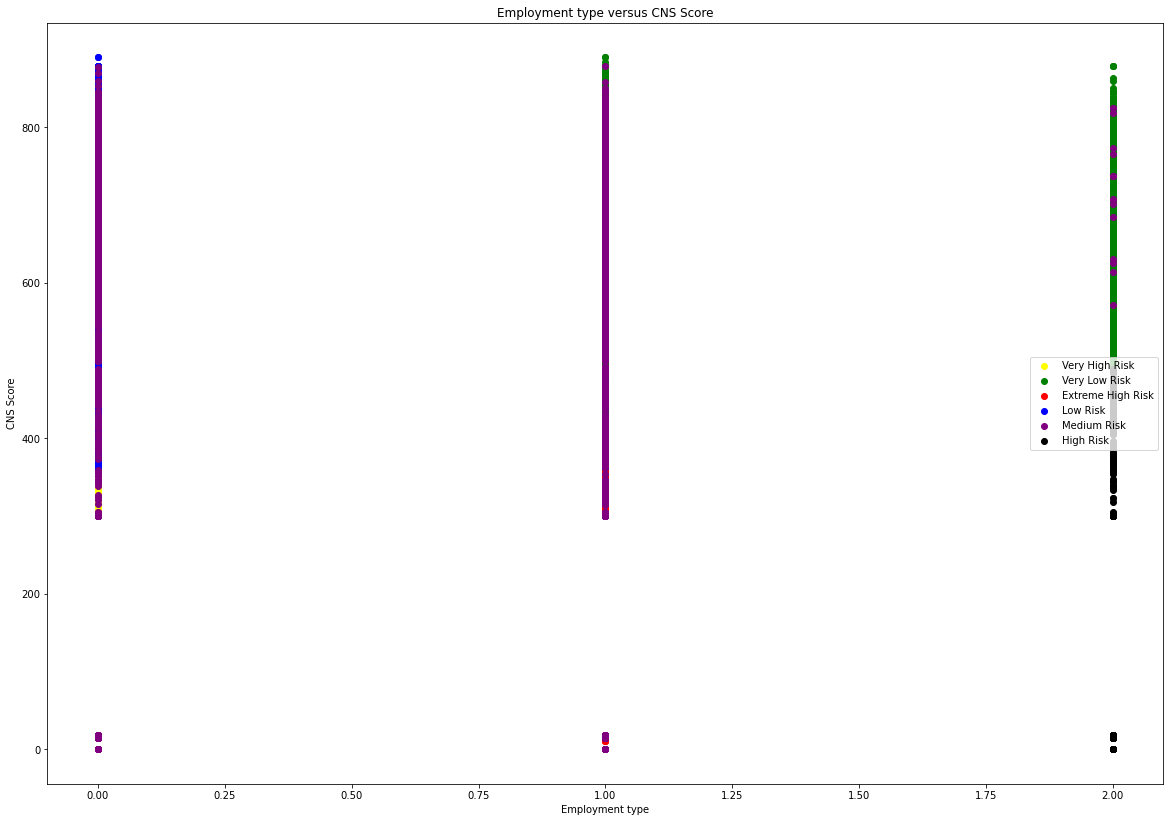

In [73]:
plt.figure(figsize=(20,14))
plt.scatter(df1['Employment.Type'],df1['PERFORM_CNS.SCORE'],color='yellow',label='Very High Risk')
plt.scatter(df2['Employment.Type'],df2['PERFORM_CNS.SCORE'],color='green',label='Very Low Risk')
plt.scatter(df3['Employment.Type'],df3['PERFORM_CNS.SCORE'],color='red',label='Extreme High Risk')
plt.scatter(df4['Employment.Type'],df4['PERFORM_CNS.SCORE'],color='blue',label='Low Risk')
plt.scatter(df5['Employment.Type'],df5['PERFORM_CNS.SCORE'],color='purple',label='Medium Risk')
plt.scatter(df6['Employment.Type'],df6['PERFORM_CNS.SCORE'],color='black',label='High Risk')
plt.xlabel('Employment type')
plt.ylabel('CNS Score')
plt.title('Employment type versus CNS Score')
plt.legend()

<h1><center>Graph analysis</center></h1>
Being employed or self employed doesn't necessarily translate into higher CNS score. The graphs clearly show an even spread within each cluster. Worth noting, however, is the fact that most medium risk customers are salaried individuals.

<h1><center>Discussion</center></h1>